# 朴素贝叶斯算法

对于连续属性，我们应该这样计算
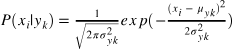

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def load_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'])
    plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()
    plt.show()
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return  data[:,:-1], data[:,-1]

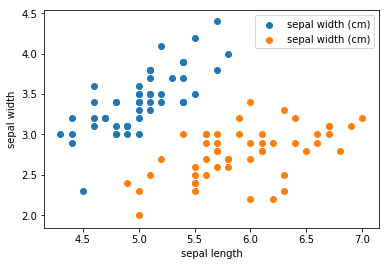

In [3]:
X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [6]:
class naiveBayesModel:
    def __init__(self):
        self.labelCount={}
        self.trainNums=0
        self.Xtrain=None
        self.ytrain=None
    
    
    def fit(self,Xtrain,ytrain):
        m,n=Xtrain.shape
        self.Xtrain=Xtrain
        self.labelCount=self.CountLabels(ytrain)
        self.ytrain=np.mat(ytrain)
        self.trainNums=m
        print("fit complete!")
        
    
    def predict(self,Xtest):
        predictLabels={}
        #计算P(y=ck)
        for label in self.labelCount.keys():
            Py=int(self.labelCount[label])/self.trainNums
            index=0  #属性序号
            for attr in Xtest:   #遍历每个序号的属性
                currentLabelIndexes=np.where(self.ytrain==label)[1]
                currentLabelDatas=self.Xtrain[currentLabelIndexes]
                currentDatas=currentLabelDatas[:,index]
                U,V=self.calcMeanAndVariance(currentDatas)
                Pc=np.exp(-((attr-U)**2)/(2*V))/(np.sqrt(2*math.pi*V))
                Py=Py*Pc
                index+=1
            
            predictLabels[label]=Py
        maxProbability=-math.inf
        pLabel=0
        for k,v in predictLabels.items():
            if v>maxProbability:
                maxProbability=v
                pLabel=k
        
        return pLabel   
    
    def score(self,Xtest,ytest):
        predictLabels=[]
        for x in Xtest:
            predictLabels.append(self.predict(x))
        accuracy=np.sum(predictLabels==y_test)/len(predictLabels)
        print("accuracy is : ",accuracy)
   

    
    def calcMeanAndVariance(self,data):
        U=np.mean(data)   #均值
        V=np.var(data,ddof=1)    #方差
        return U,V
        
        
        
    def CountLabels(self,y):
        labelCount={}
        for label in y:
            if label not in labelCount.keys():
                labelCount[label]=0
            else:
                labelCount[label]+=1
        return labelCount

In [7]:
naiveBayes=naiveBayesModel()
naiveBayes.fit(X_train,y_train)
naiveBayes.score(X_test,y_test)

fit complete!
accuracy is :  0.9666666666666667
